# Проверка на нормальность

В предыдущем юните мы говорили, что для выбора между параметрическими и непараметрическими тестами необходимо проверить распределение признаков на нормальность. Сейчас мы узнаем, что такое нормальное распределение, почему оно так важно для нас и как проверить, подчиняется ли распределение данных нормальному закону.

Начиная с этого раздела, мы будем практиковаться на Python. Для этого нам понадобятся две новых библиотеки:

[SciPy](https://docs.scipy.org/doc/scipy/index.html) — библиотека для научных и инженерных расчётов.
[Statsmodels](https://www.statsmodels.org/stable/index.html) — библиотека для статистических исследований.

Установить эти библиотеки можно с помощью стандартной команды:

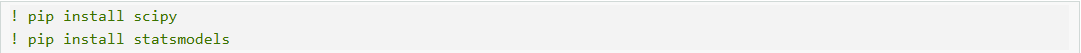

## НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Многие процессы в природе следуют нормальному закону распределения: рост человека, вес при рождении, артериальное давление, размер ноги и др.

На курсе вы уже сталкивались с понятием нормального распределения и некоторыми теоремами и правилами, основанными на особенностях нормального распределения. В частности в модуле ***«Очистка данных»*** мы изучали метод z-отклонений (трёх сигм) и метод Тьюки для поиска выбросов — они работают только для нормально распределённых данных.

Нормальное распределение (распределение Гаусса) характеризуется двумя числами:

- средним значением  (mu);
- стандартным отклонением  (sigma).

Примеры нормальных распределений с разными  и:

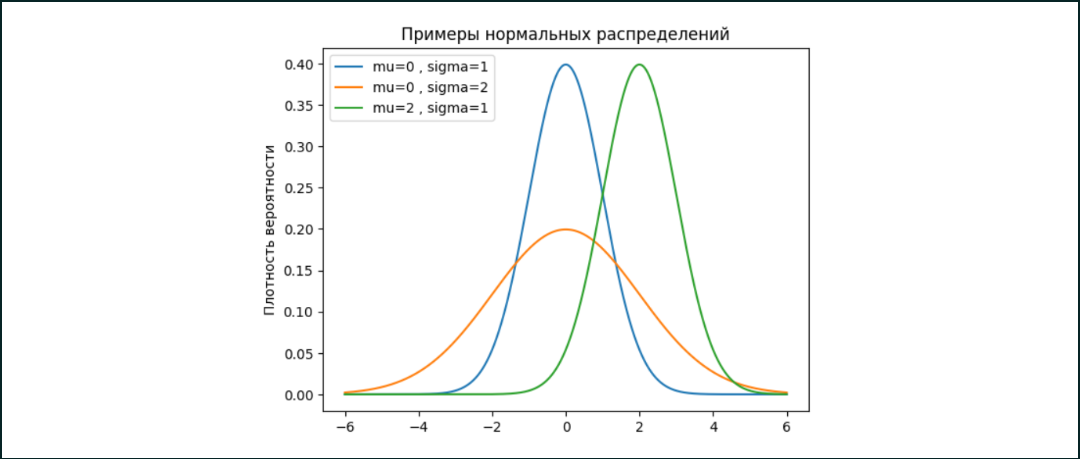

Как вы можете видеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

Любое нормальное распределение обладает следующими свойствами:

- Один пик в центре и симметричные боковые стороны (одномодальное распределение).
- Среднее и медиана равны и расположены в центре распределения.
- Отклонение значений от среднего подчиняется правилу трёх сигм:
  - 68 % значений находятся в пределах одного стандартного отклонения от среднего;
  - 95 % значений — в пределах двух стандартных отклонений;
  - 99.7% значений — в пределах трёх стандартных отклонений.

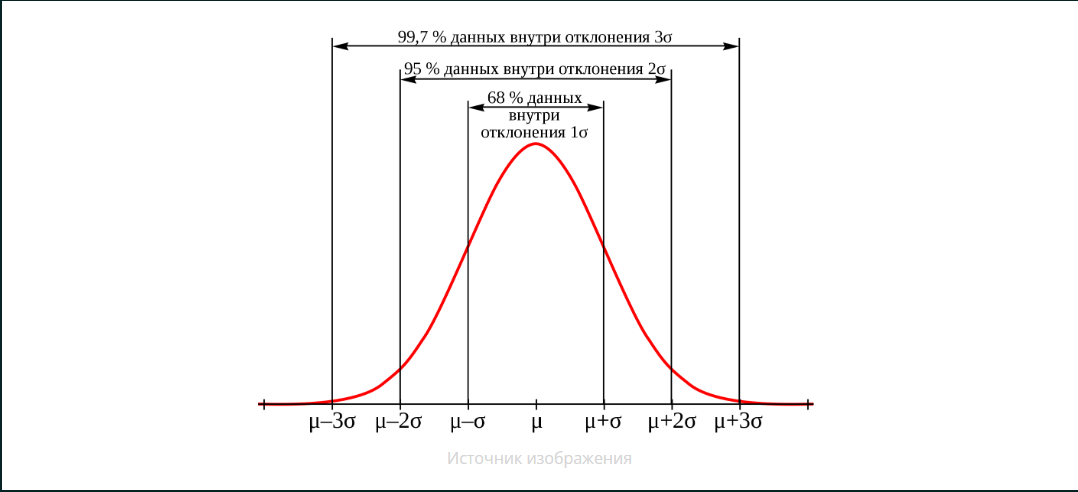

## ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

**Гистограмма**

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

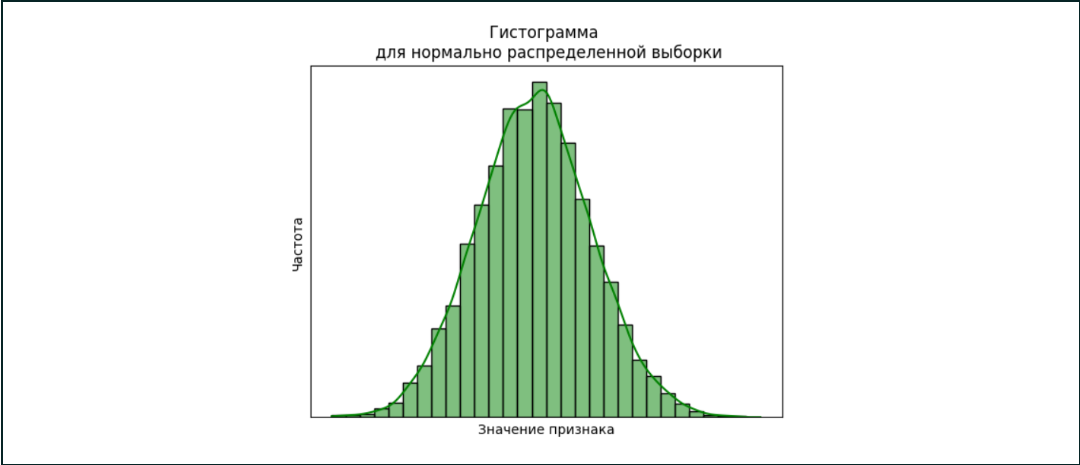

Напомним, что в Python гистограмму можно построить с помощью функции [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) пакета seaborn. Параметр *kde=True* добавляет к гистограмме график оценки плотности ядра.

Рассмотрим эту функцию на примере датасета [California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

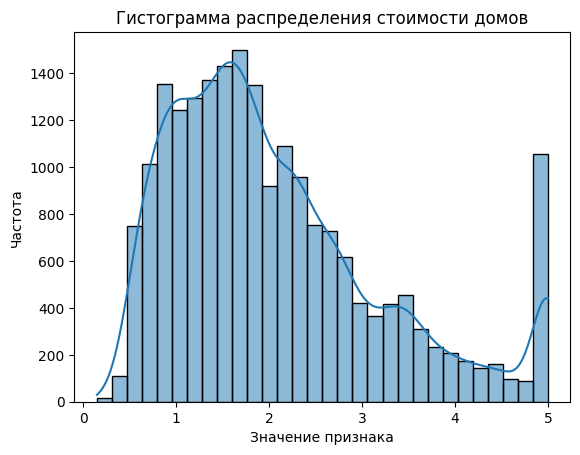

In [11]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

**Квантиль-квантиль график**

***Квантиль-квантиль график (Q-Q Plot)*** визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по Q-Q Plots.

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

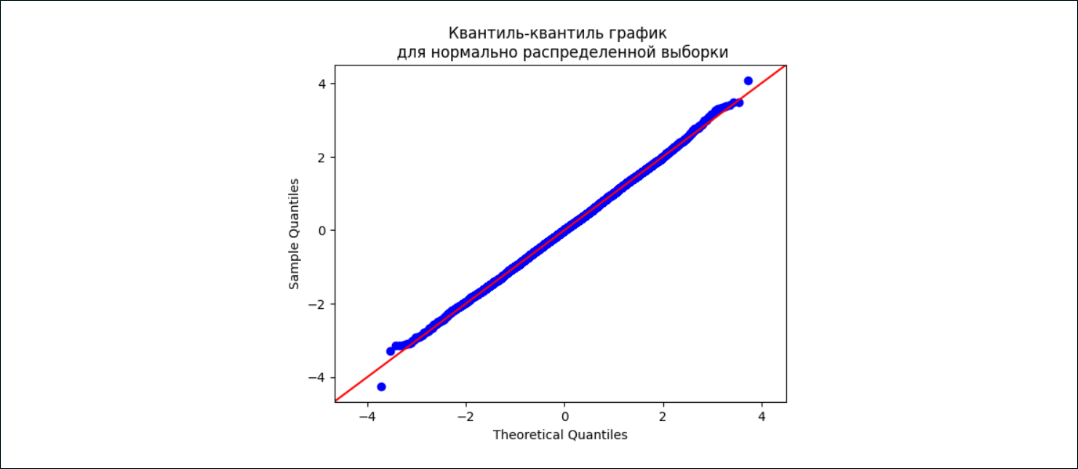

В Python квантиль-квантиль график можно построить с помощью функции [qqplot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html) пакета *statsmodels.* Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета [California Housing:](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

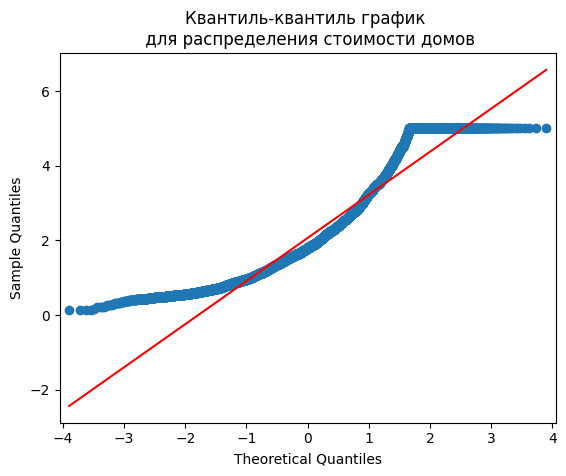

In [55]:

import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

## СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод — тест Шапиро — Уилка.

**Тест Шапиро** — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

- Нулевая: данные распределены нормально.
- Альтернативная: данные не распределены нормально.

[Детали расчёта p-value в тесте Шапиро — Уилка.](https://web.archive.org/web/20230821003522/http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0)

Если p-value теста больше уровня значимости , то мы считаем, что данные распределены нормально.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON**

В Python тест Шапиро — Уилка реализован в функции [shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

**Примечание.** Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от *p-value*, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение *p-value.*

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [40]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data) # ХЗ что это за нижнее подчеркивание, но оно выводит только p-value (исключает - статистику при выводе на экран)

# Альтернативный вариант p = stats.shapiro(data)[1]

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print(type(p))

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное
<class 'numpy.float64'>


**Мы рассмотрели графические и статистические методы проверки на нормальность. Их можно использовать как вместе, так и по отдельности.**

**Тест Шапиро — Уилка — не единственный метод проверки на нормальность. Существуют и другие, например, [тест Д’Агостино](https://lms-cdn.skillfactory.ru/assets/courseware/v1/0fcd5152bed6325a2812c9e295847038/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/guid_normal_tets.pdf) или [тест Колмогорова — Смирнова.](https://web.archive.org/web/20230201065328/http://machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0) У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. [Ещё больше способов проверки на нормальность.](https://questu.ru/articles/197465/)**

**Ранее мы говорили, что для нормально распределённых данных можно использовать параметрические тесты. Теперь мы умеем проверять, является ли распределение нормальным, а значит, настало время обсудить параметрические тесты. Но прежде давайте закрепим полученные знания небольшим тестом.**

### Задание 6.1

Зачем при проведении статистических тестов проверять данные на нормальность?

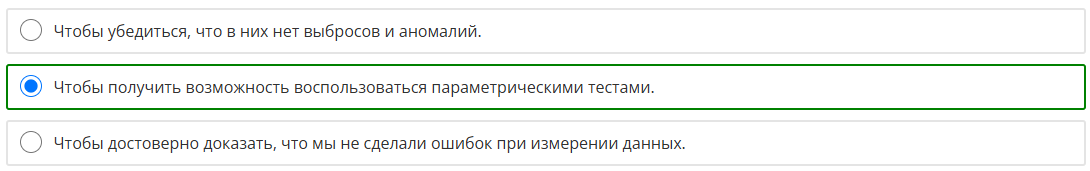

### Задание 6.2

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

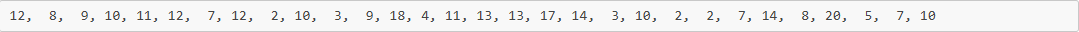

1. С помощью теста Шапиро — Уилка определите, распределены ли значения нормально. Введите полученное p-значение, округлённое до **двух знаков после точки-разделителя.**

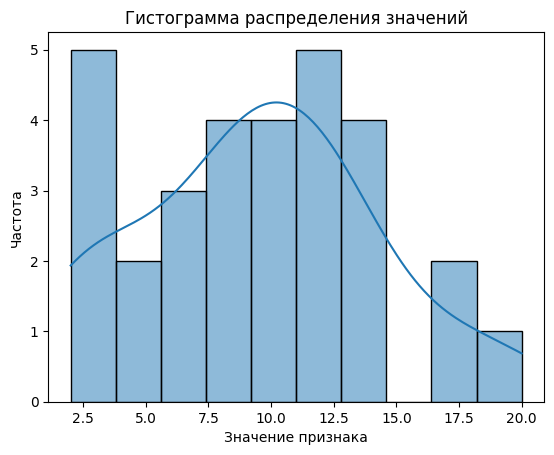

In [53]:
numbers = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]
ax = sns.histplot(numbers, bins=10, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения значений')
plt.show()

In [67]:
numbers = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]
p = stats.shapiro(numbers)[1] 

print('p-value = %.2f' % (p))


print(type(numbers))

p-value = 0.41
<class 'list'>


2. Какой вывод о нормальности выборки можно сделать?

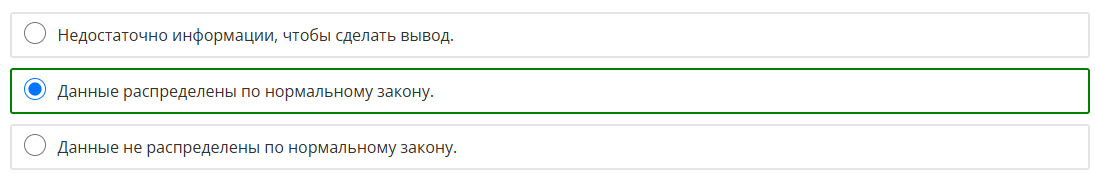